In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
xi = 0
xf = 1
nx = 50

ti = 0
tf = 1
dt = 0.001

x = np.linspace(xi,xf,nx)
t = np.arange(ti,tf,dt)

U = np.zeros((nx,len(t)))

In [ ]:
def burg(U,x,nu=0.01):

    dUdx = 0*U
    for i in range(1,nx-1):
        dUdx[i] = (U[i+1]-U[i-1])/(x[i+1]-x[i-1])

    d2Udx2 = 0*U
    for i in range(1,nx-1):
        d2Udx2[i] = (U[i+1]-2*U[i]+U[i-1])/(0.5*(x[i+1]-x[i-1]))**2

    dUdt = -U*dUdx + nu*d2Udx2

    return dUdt

In [ ]:
U0 = np.sin(2*np.pi*x)

U[:,0] = U0

In [ ]:
for i in range(1,len(t)):
    U[:,i] = U[:,i-1] + dt*burg(U[:,i-1],x)

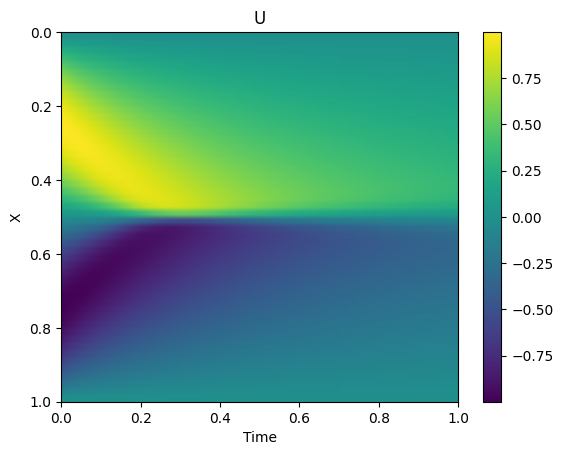

In [ ]:
plt.imshow(U, aspect='auto', extent=[ti, tf, xf, xi])
plt.xlabel('Time')
plt.ylabel('X')
plt.title('U')
plt.colorbar()
plt.show()


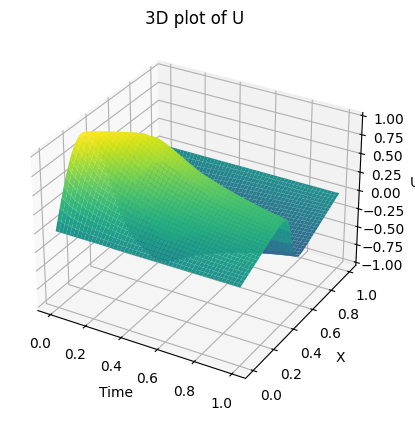

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, T = np.meshgrid(x, t)

ax.plot_surface(T, X, U.T, cmap='viridis')

ax.set_xlabel('Time')
ax.set_ylabel('X')
ax.set_zlabel('U')
ax.set_title('3D plot of U')

plt.show()